# Evaluation terminale : Machine learning & python -- Vallet Yann

Cet examen se compose de 3 parties : 
<ol>
  <li>Restitution théorique</li>
  <li>Restitution pratique</li>
  <li>Cas pratique</li>
</ol>

## Partie 1 : Restitution théorique

Pour cette partie, l'objectif est de décrire des notions théoriques. Essayez de rédiger des réponses claires en utilisant vos mots.

#### Question 1.1: Donner une définition du machine learning. Eviter de recopier de wikipédia, essayer d'en donner une description en quelques mots.

Le machine learning est une technique qui permet à une machine d'apprendre à effectuer une tâche sans avoir été programmée pour la réaliser. Cela se fait via l'utilisation d'algorithmes qui analysent des données et en tirent des conclusions liées à ces mêmes données. Les machines apprennent à partir de ces données et peuvent s'améliorer au fil du temps.

#### Question 1.2: Donner quelques applications concrètes d'utilisation du machine learning.

Le machine learning est utilisé dans de nombreuses applications, comme la reconnaissance de la parole, la traduction automatique et les prévisions météorologiques.

#### Question 1.3: Quelles sont les 2 principales familles "d'apprentissage"? Donner une rapide définition de chacune

Il existe deux formes d'lgorithme d'apprentissage : l'apprentissage supervisé et non supervisé.

Apprentissage supervisé : c'est un entraînement sur des données étiqutées qui comprennent des exemples d'entrées et de sorties désirées et de là il en déduit un modèle prédictif qui est appliqué à de nouvelles données.

#### Question 1.4: Dans laquelle de ces familles appartient la "classification"? Le "clustering"?

La classification appartient à la famille de l'apprentissage supervisé. Elle a pour objctif de prédire à quel classe appartient un élément en utilisant des données de différentes classes.
Le clustering appartient à la famille de l'apprentissage non supervisé. Elle a pour objectif de groupé en clusters des éléments similaires dans le but de trouver une relation entre eux.

#### Question 1.5: Définissez ce qu'est un arbre de décision et décrivez  de manière simple sa construction.

Un arbre de décision est un diagramme permettant de visualiser les choix et leurs conséquence.  Il se construit en lien avec une question. en identifiant les conditions influençant la réponse à cette question qui représenteront des noeuds dans l'arbre d'où partiront les embranchement possibles de l'arbre.

#### Question 1.6: Dans quelle situation parle-t-on "d'overfitting"?

 L'overfitting se produit lorsqu'un modèle de machine learning est trop adapté aux données d'entraînement et ne se généralise pas bien aux nouvelles données

## Partie 2 : Etude d'un cas pratique

Pour cette partie, vous devrez vous inspirer des TP réalisés en cours. 

Il vous faut importer les librairies qui vous seront nécessaires répondre à la problèmatique dans la cellule suivante :

In [8]:
# packages
import pandas as pd
#...
# from pandas_profiling import ProfileReport
# importing packages
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



Importez les données comme suit :

In [9]:
data = pd.read_csv('nba_logreg.csv')

Ce jeu de données décrit les caracteristiques de jeu de joueurs de Basketball au sein de la NBA. La variable d'intérêt Y est "TARGET_5yrs". La description de ce dataset se trouve dans le fichier "NBA_variables_doc.png"

__L'objectif du problème est de réussir à prédire si un jeune joueur durera plus ou moins que 5ans au sein de la ligue.__

In [10]:
data

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


#### Question 2.1: Donnez au moins une colonne qui doit être enlevé du jeu de données. Pourquoi? 

La colonne des nom est inutile car impossible de prédire des données sur un nom. De plus dans notre cas seules les valeures numériques nous intéressent

#### Exercice 2.1: Enlevez les variables du dataset qui vous semble inutile au problème.

In [11]:
# dropping useless columns
data.drop(columns=['Name'],axis=1, inplace=True)
# dropping Nan
data.drop(columns=['3P%'],axis=1, inplace=True)

#### Question 2.2: Ce dataset contient - il des données manquantes ou non exploitable?

Il existe des données manquante dans le dataset, dans la colonne 3P%

#### Exercice 2.2: Si oui, donnez en la proportion par colonne.

In [12]:
data.value_counts()

GP  MIN   PTS   FGM  FGA   FG%   3P Made  3PA  FTM  FTA  FT%   OREB  DREB  REB  AST   STL  BLK  TOV  TARGET_5Yrs
79  16.6  6.8   2.6  6.7   39.5  0.6      2.1  0.9  1.1  84.7  0.4   1.7   2.1  3.3   0.4  0.0  1.8  0.0            2
74  20.5  9.3   4.0  8.7   45.9  0.0      0.1  1.3  2.0  66.4  1.7   2.6   4.4  1.5   0.7  0.2  1.3  1.0            2
64  12.7  4.1   1.8  3.3   52.8  0.0      0.0  0.6  1.3  43.5  1.4   2.4   3.8  0.3   0.2  0.3  0.9  0.0            2
29  16.4  3.7   1.3  4.2   31.7  0.7      2.1  0.4  0.8  50.0  0.3   1.1   1.4  1.4   0.6  0.2  1.0  0.0            2
78  20.1  8.4   3.0  5.8   52.0  0.0      0.1  2.3  3.6  64.8  1.8   3.3   5.1  1.6   0.6  0.8  1.8  0.0            2
                                                                                                                   ..
52  10.7  1.9   0.8  1.7   47.1  0.0      0.0  0.3  0.5  59.3  1.0   1.6   2.6  0.3   0.2  0.2  0.5  0.0            1
    10.3  3.7   1.5  3.2   45.5  0.1      0.7  0.7  1.1  67.3

#### Exercice 2.3: Séparez les données en 2 échantillons train-test

In [13]:
# code..# model variables definitions
Y = data['TARGET_5Yrs']
X = data.drop(labels=['TARGET_5Yrs'], axis=1)

# splitting into train test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)


#### Question 2.3: Pourquoi cette étape est-elle indispensable?

Cette étape permet de créer le modèle prédictif à la base de la résolution de la question. 

#### Exercice 2.4: Entrainez sur ces données un arbre de décision. Calculer une prédiction.

In [14]:
# calling decisiontree classifier
clf = DecisionTreeClassifier()
#criterion= 'entropy', max_depth=max_depth, min_samples_split=0.1
# fitting on data
clf = clf.fit(X_train, Y_train)
# estimating on test
estimate = clf.predict_proba(X_test)[:,1]
true = Y_test
 

#### Exercice 2.5: Evaluez la qualité du modèle. 

In [15]:
# building AUC
fpr, tpr, _ = roc_curve(Y_test,  estimate)
auc_ = auc(fpr, tpr)
print(auc_)

0.5891694427619625


#### Question 2.4: Quelle métrique utilisez vous? Pourquoi? 

On utilise l'AUC et la courbe ROC

#### Question 2.5: Le modèle construit est-il de qualité satisfaisante? Expliquez.

Le modèle n'est pas très correct car la valeur attendue de l'auc doit se trouver proche de 1 

#### Exercice 2.6: Produisez une visualisation graphique de l'arbre construit

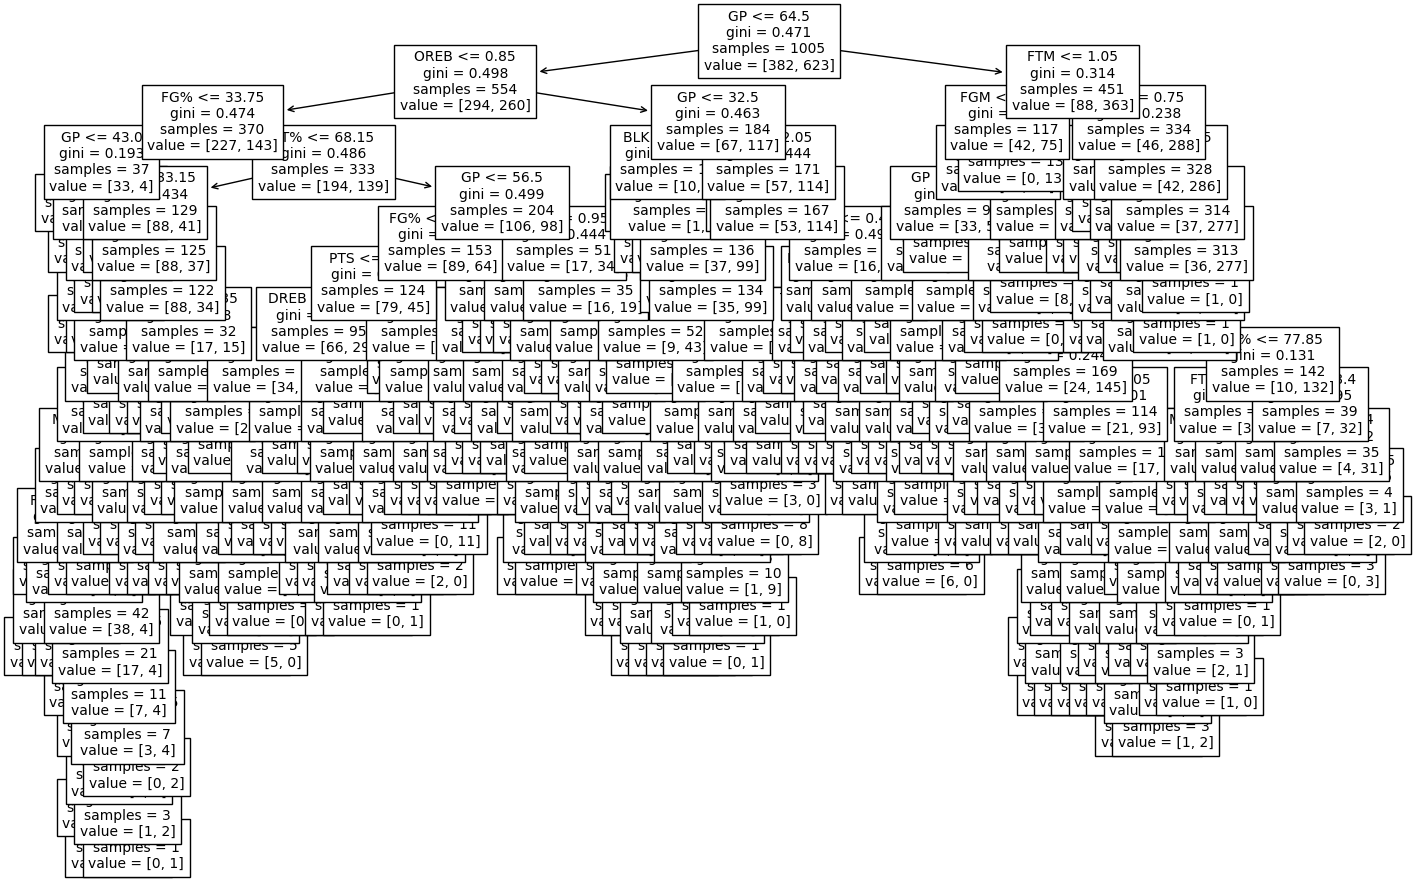

In [16]:
# plotting tree
plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Question 2.6: Donnez un exemple de lecture d'un tel arbre.

La lecture ressemble à un cas d'overfitting. 

#### Question 2.7: Comment peut - on améliorer la qualité du modèle? Donnez au moins 3 méthodes:

 On peut utiliser la grid search, augmenter la quantité des donnés d'entraînement ou utiliser une random forest.

#### Exercice 2.7: Essayer d'appliquer une de ces méthodes

best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 0.01, 'random_state': 42}
best auc: 0.7062433475391416
0.6969639612356149


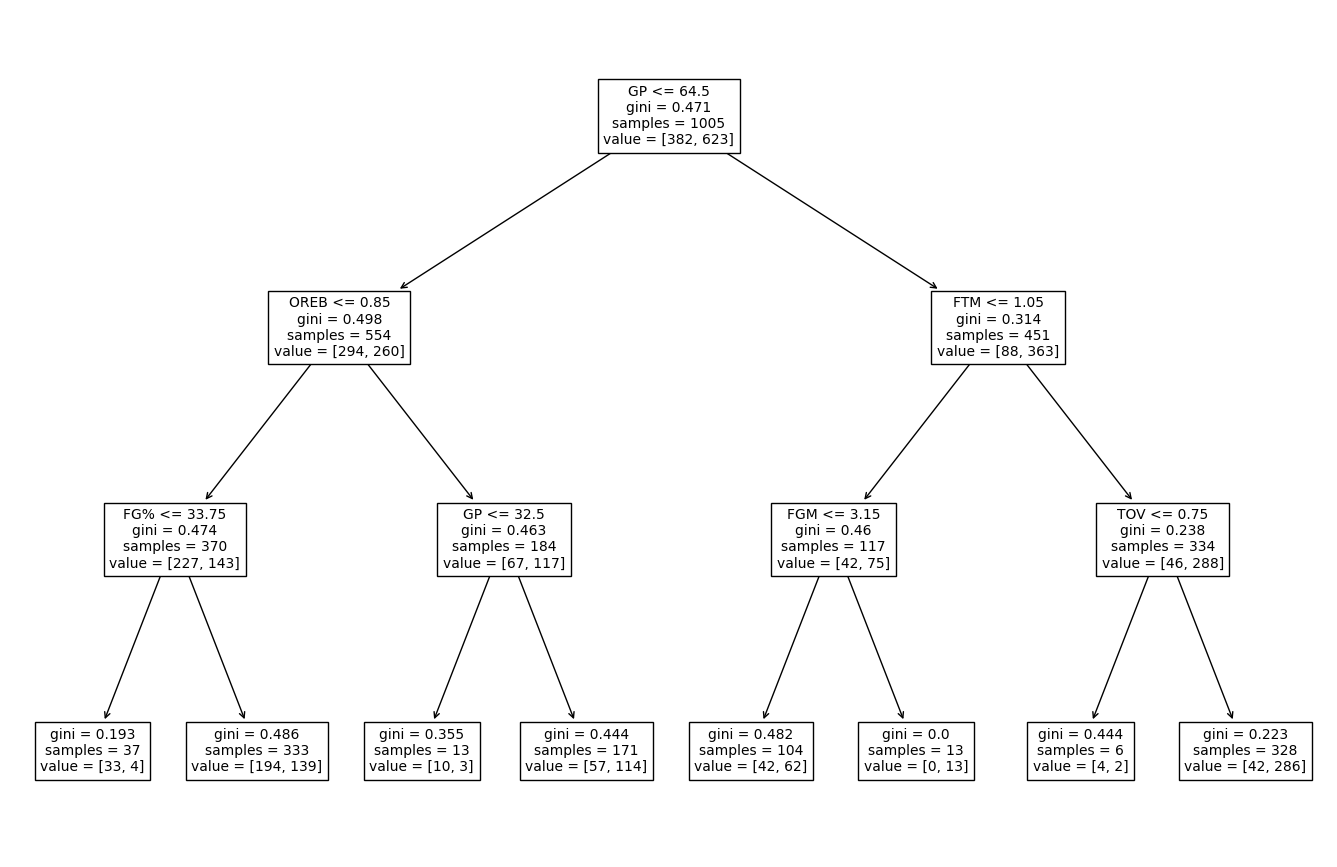

In [17]:
# Hyperparameters space
param_space = {'criterion':[ 'entropy', 'gini'], 
               'max_depth': list(range(2,10,1)),
               #'min_samples_split':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.],
               'min_samples_split':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07],
               'random_state': [42]}

# calling classifier
clf_grid = DecisionTreeClassifier()

# running search
grid_search_tree = GridSearchCV(estimator=clf_grid,
                                param_grid=param_space,
                                scoring='roc_auc',
                                cv=8)
# running search
grid_search_tree.fit(X, Y.values)

# getting best model
best_parameters = grid_search_tree.best_params_
best_auc = grid_search_tree.best_score_
print('best parameters: ' + str(best_parameters))
print('best auc: ' + str(best_auc))

# calling decisiontree classifier
clf = DecisionTreeClassifier(criterion= 'gini', max_depth=3, min_samples_split=0.1, random_state=42)
#
# fitting on data
clf = clf.fit(X_train, Y_train)
# estimating on test
estimate = clf.predict_proba(X_test)[:,1]
true = Y_test
# building AUC
fpr, tpr, _ = roc_curve(Y_test,  estimate)
auc_ = auc(fpr, tpr)
print(auc_)

# plotting tree
plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Question 2.8: Concluez

Le fait d'utiliser une grid search permet d'augmenter de manière signifiant l'auc et l'arbre obtenu est beaucoup satisfaisant.